In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import copy
from itertools import cycle, islice
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use('default')

# Begin here to import PCA and UMAP and Leiden Cluster Labels

In [2]:
pca_analysis = pd.read_csv('pca_results.csv', header = 0)
pca_analysis

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-5.556225,-0.257718,0.186786,-2.800096,0.050726,-0.010704,-0.560362,-3.071789,-2.945048,-1.946824,...,0.303822,-0.612891,0.786153,0.211624,2.257351,-2.356015,-0.341442,-0.339096,1.482910,1.897889
1,-7.209537,-7.481978,-0.162740,8.018522,-3.006617,-0.118053,-2.389257,-1.063644,0.655481,0.671241,...,0.676715,1.028544,-0.240437,2.396688,-1.040607,-2.215252,0.433334,-1.978341,-1.557420,-1.496098
2,-2.694430,1.583664,0.663126,-2.205646,1.789024,1.950146,2.070498,-1.606405,-0.911324,-1.386201,...,-0.900483,0.381840,0.508998,-1.640191,-0.271188,-2.021171,-1.815547,0.543203,-0.545106,-4.339565
3,10.143292,1.368525,-1.209819,0.700065,2.906171,0.036243,-1.272864,0.387448,-0.858374,0.004126,...,0.268223,0.930400,1.813390,-1.373973,1.640196,0.371741,0.094577,2.202551,1.797724,-0.176037
4,1.112835,8.152793,-1.332337,4.252488,-1.963194,-5.671656,-0.372425,0.136140,0.812770,-0.105267,...,1.280552,-1.423236,1.136208,1.226654,-0.449812,0.695716,2.179164,-0.441089,-4.958036,-0.704306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,9.601180,0.180180,-1.452582,0.237509,-5.028788,2.764379,-1.264232,3.897541,-0.976161,2.617133,...,3.105048,-0.072174,1.672519,-0.894084,0.917678,0.983014,-0.654412,2.679015,1.488883,0.120752
2634,-2.847886,-3.722200,0.217039,4.692725,0.254992,0.191907,-0.682628,-0.280466,2.262647,-5.913675,...,-0.989160,-2.677764,3.058086,-0.395191,-2.663330,1.620732,-0.324856,-2.521088,-2.440412,-3.539200
2635,-0.785408,-6.718586,-1.598860,4.170279,0.784721,-1.120681,-0.720857,1.615402,-0.169170,0.838488,...,-1.545383,-1.617926,-0.695416,-0.899763,0.566286,0.562708,-0.790847,-0.561099,-0.105485,0.583873
2636,0.281260,-5.921852,-1.162900,7.345957,0.484282,0.413800,-0.496882,-1.101007,1.018069,-0.100571,...,-1.825900,-2.570674,-0.177524,0.114567,2.184290,-0.260320,2.743233,-1.380870,3.580742,1.298842


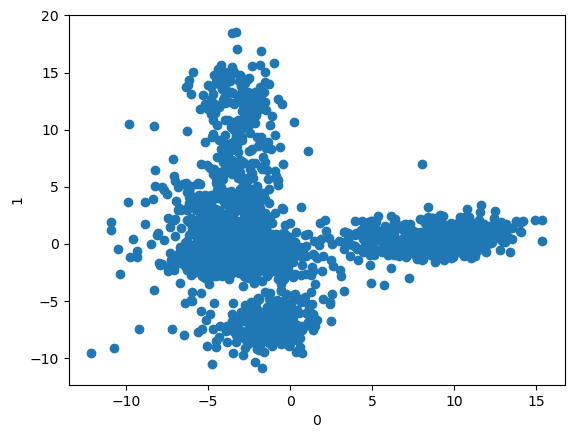

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
pcx = '0'
pcy = '1'
ax.scatter(pca_analysis[pcx], pca_analysis[pcy])
ax.set_xlabel(pcx)
ax.set_ylabel(pcy)
plt.show()

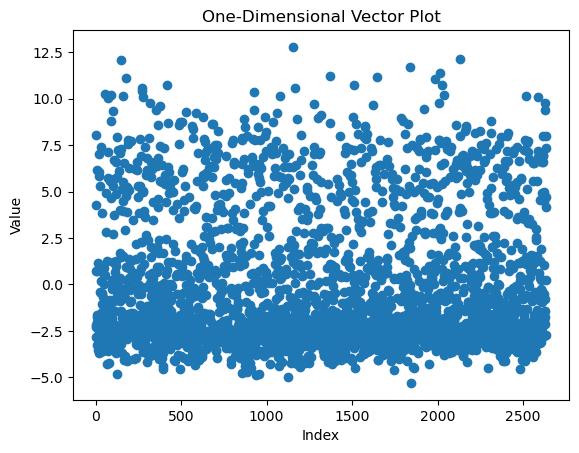

In [4]:
# Creating the plot
pcx = '3'
plt.scatter(range(2638), pca_analysis[pcx]) # 'o' is for circle markers
plt.title("One-Dimensional Vector Plot")
plt.xlabel("Index")
plt.ylabel("Value")

# Display the plot
plt.show()

In [5]:
n_pcs = 7
values_matrix = pca_analysis.values[:, 0:n_pcs]

In [6]:
values_matrix

array([[-5.5562253 , -0.25771812,  0.1867864 , ...,  0.05072647,
        -0.01070431, -0.5603624 ],
       [-7.2095366 , -7.4819775 , -0.16273957, ..., -3.0066168 ,
        -0.11805279, -2.3892572 ],
       [-2.6944296 ,  1.5836636 ,  0.6631265 , ...,  1.7890236 ,
         1.9501463 ,  2.0704982 ],
       ...,
       [-0.7854075 , -6.7185864 , -1.5988604 , ...,  0.7847215 ,
        -1.1206806 , -0.7208572 ],
       [ 0.28126037, -5.921852  , -1.1629003 , ...,  0.48428223,
         0.41380003, -0.49688184],
       [-0.09076958, -0.66350245, -0.1348503 , ...,  1.0709673 ,
        -0.2738311 ,  1.381823  ]])

In [7]:
import numpy as np

# Assuming values_matrix is your data matrix

mean = np.mean(values_matrix, axis=0)
std_dev = np.std(values_matrix, axis=0)

# Calculate the bounds for 3 standard deviations
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Create 23 bins within the bounds and add 2 bins for the outliers
bins = np.empty((10, values_matrix.shape[1]))
for col in range(values_matrix.shape[1]):
    bins[1:-1, col] = np.linspace(lower_bound[col], upper_bound[col], num=8)
    bins[0, col] = -np.inf  # Bin for values below lower bound
    bins[-1, col] = np.inf  # Bin for values above upper bound

# Digitize the values
digitized = np.empty_like(values_matrix)
for col in range(values_matrix.shape[1]):
    digitized[:, col] = np.digitize(values_matrix[:, col], bins=bins[:, col])

# digitized now contains the indices of the bins to which each value belongs


In [8]:
print(np.shape(bins))
print(np.shape(digitized))

(10, 7)
(2638, 7)


In [9]:
#count the number of points in each bin combo. We have 25 bins for each x,y
dict25 = {}
for row in digitized:
    str_row = ' '.join(map(str, row.astype(int)))
    if  str_row not in dict25.keys():
        dict25[str_row] = 1
    else:
        dict25[str_row] = dict25[str_row] + 1

In [10]:
len(dict25)

1146

In [11]:
#convert to probabilities
total_counts = sum(dict25.values())
dict25_sp = {}
for k, v in dict25.items():
    dict25_sp[k] = v / total_counts

In [12]:
#We have to sort it from highest probability to lowest in the txt output

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(dict25_sp.items(), key=lambda x: x[1], reverse=True))

455


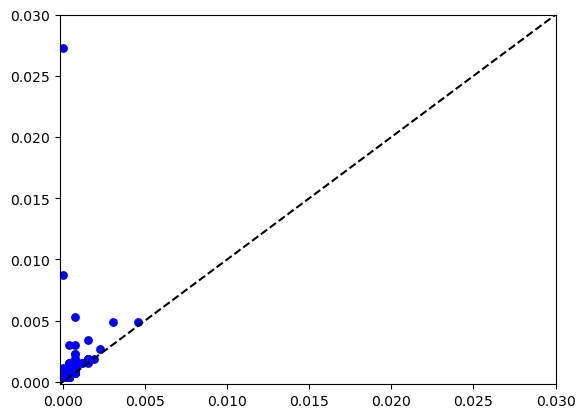

In [13]:
ph=np.loadtxt('scanpy_pcs.txt', dtype=float, usecols=(0,1), skiprows=2, delimiter='|')
for i in range(len(ph)):
    if ph[i,1]==-1.0:
        ph[i,1]=0.0
plt.scatter(ph[:,1],ph[:,0], color='blue', lw=0, s=40)
plt.plot([-1,1],[-1,1],'--k')
plt.xlim([-0.0002,0.03])
plt.ylim([-0.0002,0.03])

print(len(ph))

In [14]:
microstates = pd.read_csv( "scanpy_pcs.txt.negmap" , sep="|" , skiprows= [1])
microstates.columns = [col.strip() for col in microstates.columns]
microstates["Vector"] = microstates["Vector"].apply(lambda v: np.array(v.strip().strip("[|]").split(), dtype= int))
microstates.head()

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.024640,1,0,"[4, 5, 5, 4, 5, 4, 5]"
2,0.019712,2,0,"[4, 5, 5, 4, 5, 5, 6]"
3,0.013268,3,0,"[4, 5, 5, 4, 5, 4, 4]"
4,0.012130,4,0,"[4, 5, 5, 4, 5, 4, 6]"


In [15]:
peaks = pd.read_csv("scanpy_pcs.txt" , sep="|" , skiprows= [1])
peaks.columns = [col.strip() for col in peaks.columns]
peaks.head()

,Birth Probability,Death Probability,Birth State Index,Death State Index
0,0.027293,-1.0,0,-1
1,0.008719,-1.0,9,-1
2,0.001137,-1.0,207,-1
3,0.000758,-1.0,371,-1
4,0.000758,-1.0,268,-1


In [16]:
clusters_ids = peaks["Birth State Index"].unique()

cluster_centers = np.array(microstates['Vector'][clusters_ids])

In [17]:
#Now we want to relabel the Pk value of the Pk centers because we had to kill them during persistent homology algorithm

for peak in clusters_ids:
    microstates['Pk'][peak] = peak
microstates[0:10]

/var/folders/zy/fbwt9jj16vg4gzyd8mdl2mrm0000gn/T/ipykernel_7552/3833619904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microstates['Pk'][peak] = peak
/var/folders/zy/fbwt9jj16vg4gzyd8mdl2mrm0000gn/T/ipykernel_7552/3833619904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microstates['Pk'][peak] = peak
/var/folders/zy/fbwt9jj16vg4gzyd8mdl2mrm0000gn/T/ipykernel_7552/3833619904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.024640,1,0,"[4, 5, 5, 4, 5, 4, 5]"
2,0.019712,2,0,"[4, 5, 5, 4, 5, 5, 6]"
3,0.013268,3,0,"[4, 5, 5, 4, 5, 4, 4]"
4,0.012130,4,0,"[4, 5, 5, 4, 5, 4, 6]"
5,0.011372,5,0,"[4, 5, 5, 4, 5, 5, 4]"
6,0.010235,6,0,"[4, 5, 5, 4, 6, 5, 6]"
7,0.010235,7,0,"[5, 5, 5, 4, 5, 4, 5]"
8,0.009098,8,0,"[5, 5, 5, 4, 5, 5, 5]"
9,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]"


In [18]:
# group dataframe by "Pk" and sum the "Prob" column for each group
cluster_probs = microstates.groupby('Pk')['Prob'].sum().to_dict()
cluster_probs = dict(sorted(cluster_probs.items(), key=lambda x: x[1])) #, reverse = True

#print(cluster_probs)

In [28]:
# Function to find Pk value for a given vector element
def find_pk_for_vector_element(dataframe, vector_element):
    for index, row in dataframe.iterrows():
        if np.array_equal(row['Vector'], vector_element):
            return row['Pk']
    return None

pks_for_data = []
for i in range(len(digitized)):
    pks_for_data.append(find_pk_for_vector_element(microstates, digitized[i].astype(int)))
print(len(pks_for_data))
print(type(pks_for_data))

2638
<class 'list'>


In [31]:
#print(pks_for_data)

In [20]:
from collections import Counter

frequency = Counter(pks_for_data)

# Extract keys where values are less than 5
keys_less_than = [key for key, value in frequency.items() if value < 5] #ari = 0.89 for <5

In [32]:
print(type(keys_less_than))
#print(keys_less_than)

<class 'list'>


In [21]:
print(len(frequency))
print(len(keys_less_than))

455
420


In [22]:
#This is just an example of how I compute the distance between all the clusters (islands)

import numpy as np
from scipy.spatial.distance import cdist
#this computes the single linkage distance between every island (cluster) based on the euclidean metric
#output is a symmetric matrix

size = len(clusters_ids)
NEW_single_linkage_distances = np.zeros((size, size))
labels = list(cluster_probs.keys())

for i, label1 in enumerate(labels):
    island1 = list(microstates.loc[microstates['Pk'] == label1, 'Vector'])
    for j in range(i+1, len(labels)):
        label2 = labels[j]
        island2 = list(microstates.loc[microstates['Pk'] == label2, 'Vector'])
        #distance_matrix = cdist(island1, island2, metric='euclidean')
        distance_matrix = cdist(island1, island2, metric='cityblock')
        min_distance = np.min(distance_matrix)
        NEW_single_linkage_distances[i, j] = min_distance
        NEW_single_linkage_distances[j, i] = min_distance

In [23]:
microstates_pks = microstates['Pk']
microstates_vectors = microstates['Vector']

In [24]:
# count how many islands (i.e. clusters) have a probability less than 5/2638
count = sum(1 for value in cluster_probs.values() if value < 5/2638)
count

420